# Classification Evaluation Measure

## Accuracy

**정확도 = 예측결과가 동일한 데이터 수 / 전체 예측 데이터 수**

* 단순한 이진 분류의 경우 (Binominal) 모델의 성능을 외곡할 가능성이 있음
* 정확도는 목표변수가 불균형한 경우, 적합한 평가지표가 될 수 없음

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score, precision_score,recall_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# 그래프 시각화 옵션 
%matplotlib inline

# 그래프의 한글 폰트를 설정 
mpl.rc('font', family = "Malgun Gothic") #맑은 고딕 설정 

#그래프의 한글을 더욱 선명하게 출력 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수값이 나올때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus = False)

In [5]:
df1 = pd.read_csv("ex2.csv")
print(df1.shape)
df1.head()

(51304, 15)


,고객ID,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부
0,66758234,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9.0,새마을금고,정상
1,66755948,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2.0,현대카드,정상
2,66756657,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8.0,우리은행,정상
3,66423450,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5.0,농협회원조합,정상
4,66423204,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,해약확정,12,있음,8.0,농협회원조합,해약


In [6]:
df1['해약여부'].value_counts()

정상    50372
해약      907
Name: 해약여부, dtype: int64

In [7]:
df1.isnull().sum()

고객ID        0
판매유형        4
계약유형        1
유통경로        0
계약일         0
계약기간        0
납부유형        0
제품군         1
월랜탈비용       0
계약상태        0
연체건수        0
연체여부        2
신용등급     8783
결제은행     2760
해약여부       25
dtype: int64

In [8]:
data = df1[['판매유형', '계약유형','계약기간',
            '납부유형', '제품군', '월랜탈비용','해약여부']].dropna()

In [9]:
X = data[['판매유형', '계약유형','계약기간','납부유형', '제품군', '월랜탈비용']]
Y = data[['해약여부']]
Y = Y.replace('해약',1).replace('정상',0)

print(X.shape)
print(Y.shape)

(51273, 6)
(51273, 1)


In [10]:
X = pd.get_dummies(X)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

print("Train X : ",X_train.shape)
print("Test X : ",X_test.shape)
print("Train Y : ",Y_train.shape)
print("Test Y : ",Y_test.shape)

Train X :  (35891, 24)
Test X :  (15382, 24)
Train Y :  (35891, 1)
Test Y :  (15382, 1)


In [12]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
Y_pred_test = model.predict(X_test)

accuracy_score(Y_test,Y_pred_test).round(3)

0.983

## Confusion Matrix


* 오차행렬 (Confusion Matrix)
* 오차행렬의 값을 이용해, 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 계산 할 수 있다.  
![img1](https://www.researchgate.net/profile/Juan_Banda/publication/256418526/figure/fig1/AS:297921313558528@1448041384565/Confusion-matrix-example.png)

* 이진 분류 모델에서, 찾아야하는 적은 수 결과 값에 Positive(1), 나머지 대다수의 값에 Negative(0)값을 부여함 
* 불균형한 이진데이터에서는 Negative 쪽으로 예측 정확도가 높은 경향을 나타낸다.

In [13]:
confusion_matrix(Y_test,Y_pred_test)

array([[15111,     1],
       [  263,     7]], dtype=int64)

Text(0.5,15.5781,'Predicted label')

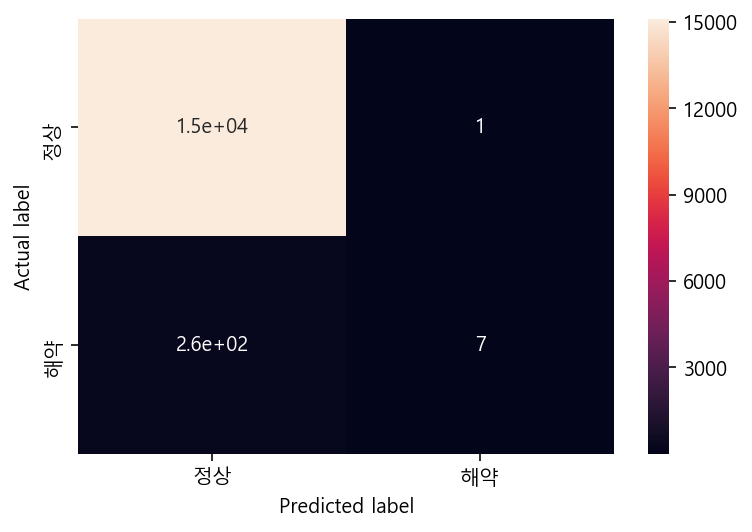

In [14]:
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred_test), columns=['정상','해약'], index=['정상','해약'])
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Precision & Recall

**정밀도 (Precision) : True Positive / (False Positive + True Positive)**
* 예측을 Positive로 한 대상 중에 예측값과 실제값이 Positive로 일치한 데이터의 비율 
* Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표 (양측 예측도)
* 문제가 없는 데이터를 문제가 있다고 잘못 판단할 때 발생하는 이슈를 나타내는 지표
* False Positive를 낮추는데 초점을 둠 

**재현률 (Recall) : True Positive / (False Negative + True Positive)**
* 실제값이 Positive인 대상 중에서 예측값과 실제값이 Positive로 일치한 데이터의 비율 
* 민감도(Sensitivity) 또는 TPR(True Positive Rate)로 불림
* 실제 문제가 있는 데이터를 문제가 없다고 잘못 판단할 때 발생하는 이슈를 나타내는 지표
* False Negative을 낮추는데 초점을 둠


**두 수치가 모두 좋아야 하며 하나라도 낮은 경우, 바람직하지 않은 모델이라 판단**

In [15]:
print("Precision : ",precision_score(Y_test,Y_pred_test))
print("Recall : ",recall_score(Y_test,Y_pred_test))

Precision :  0.875
Recall :  0.025925925925925925


* 정밀도에 비해 재현률이 매우 낮게나옴, 즉 문제가 있는 데이터를 문제가 없다고 판단할 가능성이 매우 높음 

## Precision & Recall Trade - Off 

* 정밀도나 재현률을 특별히 강조해야할 경우, Threshold를 조정하여, 정밀도 또는 재현률을 높일 수 있다. 
* 그러나, 한 쪽을 강제로 높이면, 다른 한 쪽이 낮아질 가능성이 있음 (Trade-Off)
* predict_proba() : 개별 데이터 별로 예측확률을 반환 
    * 첫번째 Column : 지정된 레이블 0값으로 예측할 확률
    * 두번째 Column : 지정된 레이블 1값으로 예측할 확률

In [16]:
pd.DataFrame(model.predict_proba(X_test)).head()

,0,1
0,0.996865,0.003135
1,0.995977,0.004023
2,0.986330,0.013670
3,0.995334,0.004666
4,0.995977,0.004023


In [17]:
pd.DataFrame( model.predict(X_test)).head()

,0
0,0
1,0
2,0
3,0
4,0


In [18]:
result = np.concatenate([model.predict_proba(X_test), model.predict(X_test).reshape(-1,1)],axis=1)
pd.DataFrame(result, columns=['정상확률','해약확률','예측(해약)']).head()

,정상확률,해약확률,예측(해약)
0,0.996865,0.003135,0.0
1,0.995977,0.004023,0.0
2,0.986330,0.013670,0.0
3,0.995334,0.004666,0.0
4,0.995977,0.004023,0.0


* 분류기법은 위에 계산된 두 값중 더 큰 값으로 예측을 실시하게 되는 원리 
* 위의 분류 결정 임계값을 설정하여, 예측값을 다르게 구할 수 있음 
* Threshold를 다르게 주어, 해약할 확률이 0.01만 넘어도 **"해약"** 으로 예측 

In [19]:
from sklearn.preprocessing import Binarizer

customer_threshold = 0.15
Binarizer(threshold = customer_threshold)

prdict_proba = model.predict_proba(X_test)

# reshape 함수는 한행으로 이어진 array를 열로 변환
prdict_proba_col = prdict_proba[:,1].reshape(-1,1)

# 새로운 임계값을 적용 
customer_Binarizer = Binarizer(threshold = customer_threshold).fit(prdict_proba_col)
customer_Predict = customer_Binarizer.transform(prdict_proba_col)

# 새로운 임계값으로 계산된 새로운 예측값 
customer_Predict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

**결과 확인**

In [20]:
# 결과 확인 
confusion_matrix(Y_test,customer_Predict)

array([[14571,   541],
       [  130,   140]], dtype=int64)

Text(0.5,15.5781,'Predicted label')

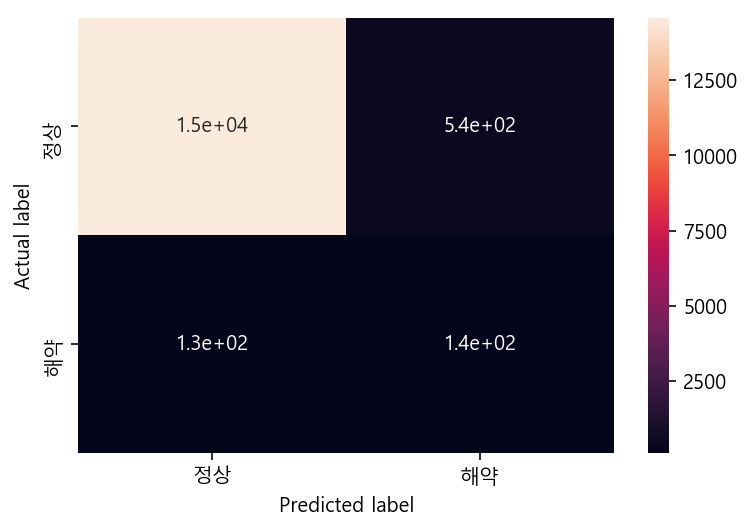

In [21]:
cm = pd.DataFrame(confusion_matrix(Y_test, customer_Predict), columns=['정상','해약'], index=['정상','해약'])
sns.heatmap(cm, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print("Accuracy : ",accuracy_score(Y_test,customer_Predict).round(3))
print("Precision : ",precision_score(Y_test,customer_Predict))
print("Recall : ",recall_score(Y_test,customer_Predict))

Accuracy :  0.956
Precision :  0.2055800293685756
Recall :  0.5185185185185185


* 임계값을 바꾼 결과, 재현율이 높아짐을 볼 수 있음

**Sklearn API 를 이용한 Precision과 Recall Curve**

In [23]:
from sklearn.metrics import precision_recall_curve

# Test Set으로 Model을 적용했을 때, 해약일 확률 값 
prdict_proba_class1 = model.predict_proba(X_test)[:,1]

In [24]:
def precision_recall_curve_plot(Y_test, prdict_proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, prdict_proba_class1)
    
    plt.figure(figsize=[10,10])
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # 그래프 X축 Scaling (Scale 단위를 0.1로 지정)
    start ,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # 그래프 설정 
    plt.xlabel('Threshold value')
    plt.title('Precision & Recall value')
    plt.legend()
    plt.show()

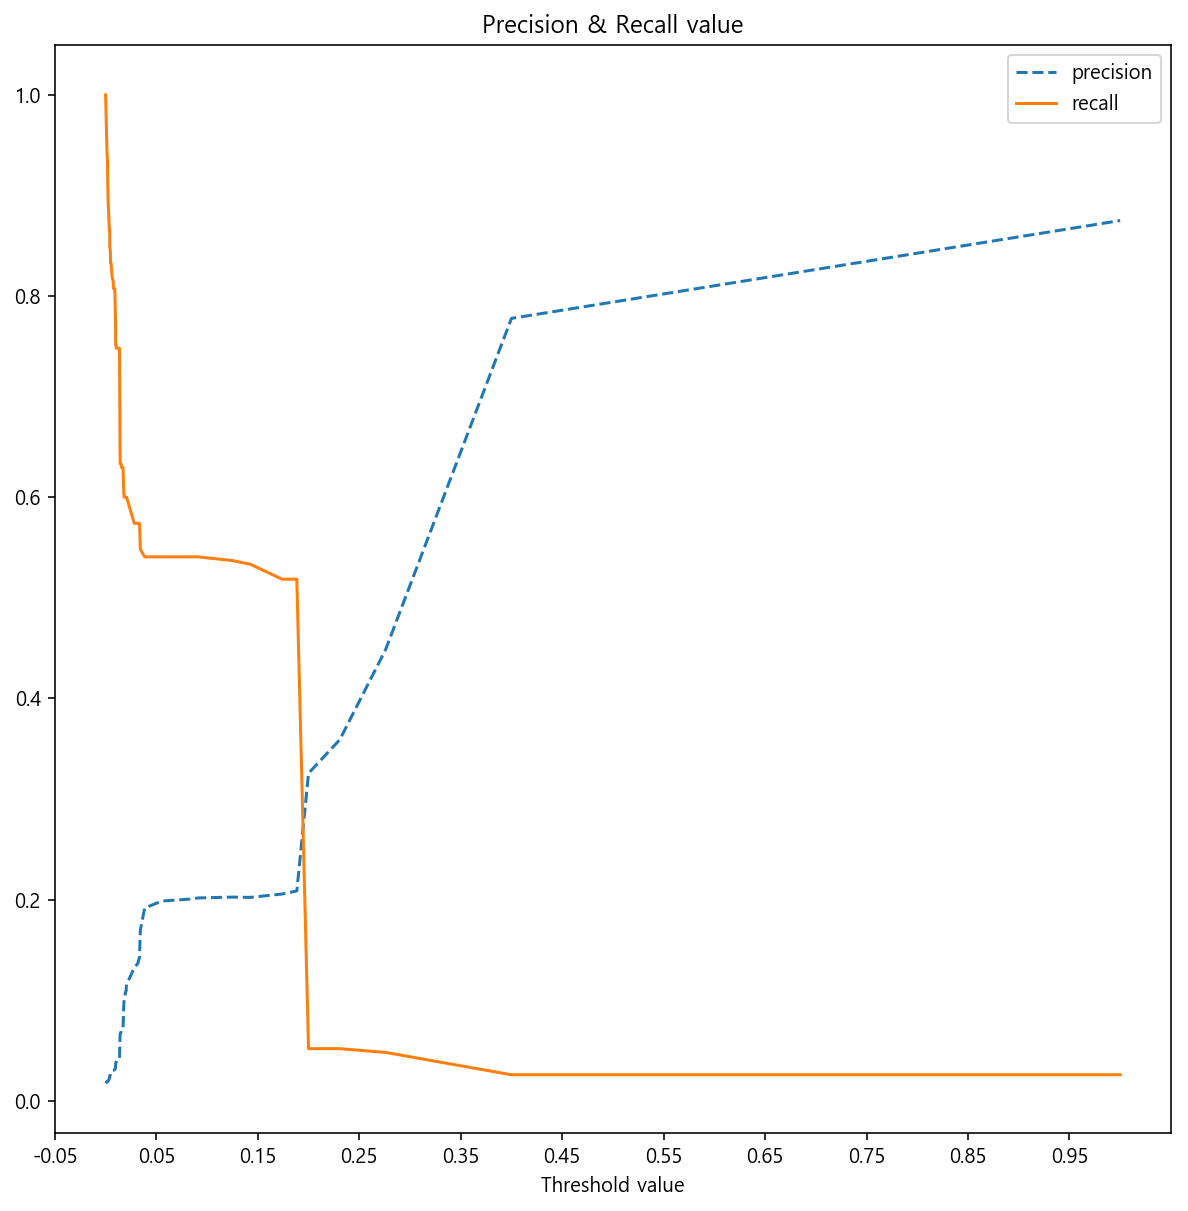

In [25]:
precision_recall_curve_plot(Y_test,prdict_proba_class1)

* 임계값이 0.2 인근에서 재현율과 정밀도가 같아짐

## F1 Score

* F1 Score : 정밀도와 재현률의 결합 지표 
* 정밀도와 재현률이 한쪽으로 치우치지 않을때, 높은 값을 나타낸다.


![img1](https://www.qualtrics.com/eng/wp-content/uploads/2016/11/f1-score.jpg)

**Sklearn F1 Score API**

In [26]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test,Y_pred_test)
print("F1 Score : ",f1.round(3))

F1 Score :  0.05


**Threshold 값에 따른 Accuracy, Presicion, Recall, F1 Score**

In [27]:
def classification_evaluation(Y_test,Y_pred_test):
    confusion = confusion_matrix(Y_test,Y_pred_test)
    accuracy = accuracy_score(Y_test,Y_pred_test)
    precision = precision_score(Y_test,Y_pred_test)
    recall = recall_score(Y_test,Y_pred_test)
    f1 = f1_score(Y_test,Y_pred_test)
    print("Confusion Matrix")
    print(confusion)
    print(" ")
    print("정확도 : ",accuracy.round(3))
    print("정밀도 : ",precision.round(3))
    print("재현률 : ",recall.round(3))
    print("F1 Score : ",f1.round(3))
    print(" ")

def classification_evaluation_Threshold(Y_test,Y_pred_test,thresholds):
    for customer_threshold in thresholds:
        customer_Binarizer = Binarizer(threshold = customer_threshold).fit(Y_pred_test)
        customer_Predict = customer_Binarizer.transform(Y_pred_test)
        print("======= Threshold : ", customer_threshold,"=======")
        classification_evaluation(Y_test,customer_Predict)

In [28]:
# 임계값 
thresholds = [0.11, 0.15, 0.19, 0.21]  

# Test Set으로 Model을 적용했을 때, 해약일 확률 값 
prdict_proba_class1 = model.predict_proba(X_test)[:,1].reshape(-1,1)


classification_evaluation_Threshold(Y_test,prdict_proba_class1,thresholds)

======= Threshold :  0.11 =======
Confusion Matrix
[[14541   571]
 [  125   145]]
 
정확도 :  0.955
정밀도 :  0.203
재현률 :  0.537
F1 Score :  0.294
 
======= Threshold :  0.15 =======
Confusion Matrix
[[14571   541]
 [  130   140]]
 
정확도 :  0.956
정밀도 :  0.206
재현률 :  0.519
F1 Score :  0.294
 
======= Threshold :  0.19 =======
Confusion Matrix
[[15083    29]
 [  256    14]]
 
정확도 :  0.981
정밀도 :  0.326
재현률 :  0.052
F1 Score :  0.089
 
======= Threshold :  0.21 =======
Confusion Matrix
[[15087    25]
 [  256    14]]
 
정확도 :  0.982
정밀도 :  0.359
재현률 :  0.052
F1 Score :  0.091
 


## ROC Curve & AUC

**ROC (Receiver Operation Characteristic Curve)**

* '수신자판단곡선' 이라고도 불림, 일반적으로 의학분야 또는 머신러닝의 이진분류 모델 성능평가로 사용됨 
* FPR(False Positive Rate)가 변화함에 따라 ** TPR(True Positive Rate, 재현률 Recall)** 가 어떻게 변하는지 나타내는 곡선
    * 민감도(TPR) : 실제값 Positive가 정확히 예측되어야 하는 수준을 나타냄 (이상이 있는 것을 이상이 있다고 판단)
    * 특이성(TNR) : 실제값 Negative가 정확히 예측되어야 하는 수준을 나타냄 (이상이 없는 것을 이상이 없다고 판단)

In [29]:
from sklearn.metrics import roc_curve

In [30]:
prdict_proba_class1 = model.predict_proba(X_test)[:,1]

fprs , tprs , thresholds = roc_curve(Y_test, prdict_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55]
샘플용 10개의 임곗값:  [2.   0.2  0.09 0.03 0.02 0.02 0.01 0.01 0.01 0.01 0.   0.  ]
샘플 임곗값별 FPR:  [0.    0.002 0.038 0.048 0.083 0.101 0.154 0.322 0.41  0.528 0.673 0.794]
샘플 임곗값별 TPR:  [0.    0.052 0.541 0.548 0.6   0.604 0.633 0.748 0.774 0.833 0.867 0.896]


**ROC Curve Plot|**

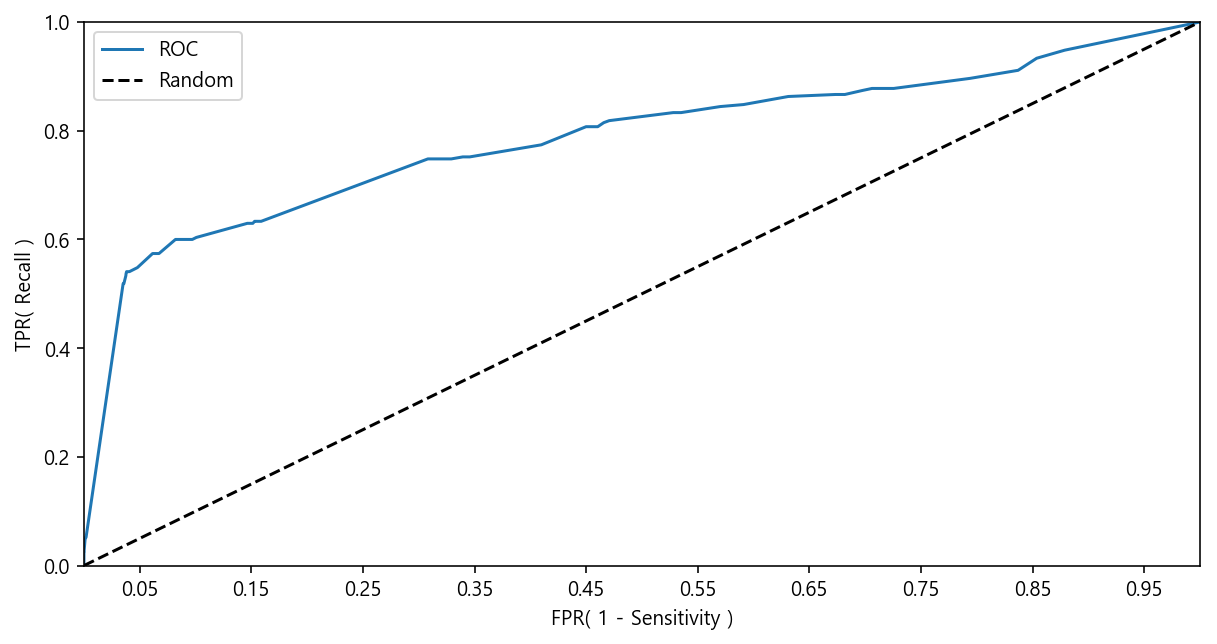

In [39]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.figure(figsize=[10,5])
    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(Y_test, prdict_proba_class1)

**ROC & AUC 값**

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_score = roc_auc_score(Y_test, Y_pred_test)
print('ROC AUC 값: ', roc_score.round(3))

ROC AUC 값:  0.513


**Threshold 값에 따른 Accuracy, Presicion, Recall, F1 Score, ROC & AUC**

In [34]:
def classification_evaluation(Y_test,Y_pred_test):
    confusion = confusion_matrix(Y_test,Y_pred_test)
    accuracy = accuracy_score(Y_test,Y_pred_test)
    precision = precision_score(Y_test,Y_pred_test)
    recall = recall_score(Y_test,Y_pred_test)
    f1 = f1_score(Y_test,Y_pred_test)
    roc_score = roc_auc_score(Y_test, Y_pred_test)

    print("Confusion Matrix")
    print(confusion)
    print(" ")
    print("정확도 : ",accuracy.round(3))
    print("정밀도 : ",precision.round(3))
    print("재현률 : ",recall.round(3))
    print("F1 Score : ",f1.round(3))
    print('ROC AUC 값: ', roc_score.round(3))
    print(" ")

def classification_evaluation_Threshold(Y_test,Y_pred_test,thresholds):
    for customer_threshold in thresholds:
        customer_Binarizer = Binarizer(threshold = customer_threshold).fit(Y_pred_test)
        customer_Predict = customer_Binarizer.transform(Y_pred_test)
        print("======= Threshold : ", customer_threshold,"=======")
        classification_evaluation(Y_test,customer_Predict)

In [41]:
# 임계값 
thresholds = [0.11, 0.15, 0.19, 0.21]  

# Test Set으로 Model을 적용했을 때, 해약일 확률 값 
prdict_proba_class1 = model.predict_proba(X_test)[:,1].reshape(-1,1)


classification_evaluation_Threshold(Y_test,prdict_proba_class1,thresholds)

======= Threshold :  0.11 =======
Confusion Matrix
[[14541   571]
 [  125   145]]
 
정확도 :  0.955
정밀도 :  0.203
재현률 :  0.537
F1 Score :  0.294
ROC AUC 값:  0.75
 
======= Threshold :  0.15 =======
Confusion Matrix
[[14571   541]
 [  130   140]]
 
정확도 :  0.956
정밀도 :  0.206
재현률 :  0.519
F1 Score :  0.294
ROC AUC 값:  0.741
 
======= Threshold :  0.19 =======
Confusion Matrix
[[15083    29]
 [  256    14]]
 
정확도 :  0.981
정밀도 :  0.326
재현률 :  0.052
F1 Score :  0.089
ROC AUC 값:  0.525
 
======= Threshold :  0.21 =======
Confusion Matrix
[[15087    25]
 [  256    14]]
 
정확도 :  0.982
정밀도 :  0.359
재현률 :  0.052
F1 Score :  0.091
ROC AUC 값:  0.525
 


In [1]:
print("Done")

Done
